In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import io
import imageio
from IPython.display import Image, display
from ipywidgets import widgets, Layout, HBox
import os

2022-06-08 11:10:14.513676: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-08 11:10:14.513699: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
# Download and load the dataset.
fpath = keras.utils.get_file(
    "moving_mnist.npy",
    "mnist_test_seq.npy",
)
# os.path(fpath)
dataset = np.load(fpath)

ValueError: unknown url type: '/mnist_test_seq.npy'

In [5]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [6]:
dataset.shape

(20, 10000, 64, 64)

In [7]:
dataset = np.swapaxes(dataset, 0,1)

In [8]:
# dataset.shape

In [9]:
dataset = dataset[:1000,...]
dataset = np.expand_dims(dataset, axis=-1)
# print(dataset.shape)

indexes = np.arange(dataset.shape[0])
np.random.shuffle(indexes)

train_index = indexes[ : int(0.9*dataset.shape[0])]
val_index = indexes[int(0.9 * dataset.shape[0]) :]
train_dataset = dataset[train_index]
val_dataset = dataset[val_index]

train_dataset=train_dataset/255
val_dataset = val_dataset/255

# val_dataset[0,0]

In [10]:
def create_shifted_frames(data):
    x = data[:,0: data.shape[1]-1,:,:]
    y = data[:,1:data.shape[1],:,:]
    return x,y
    

In [11]:
x_train, y_train = create_shifted_frames(train_dataset)
x_val, y_val = create_shifted_frames(val_dataset)


In [12]:

# Inspect the dataset.
print("Training Dataset Shapes: " + str(x_train.shape) + ", " + str(y_train.shape))
print("Validation Dataset Shapes: " + str(x_val.shape) + ", " + str(y_val.shape))

Training Dataset Shapes: (900, 19, 64, 64, 1), (900, 19, 64, 64, 1)
Validation Dataset Shapes: (100, 19, 64, 64, 1), (100, 19, 64, 64, 1)


Displaying frames for example 429.


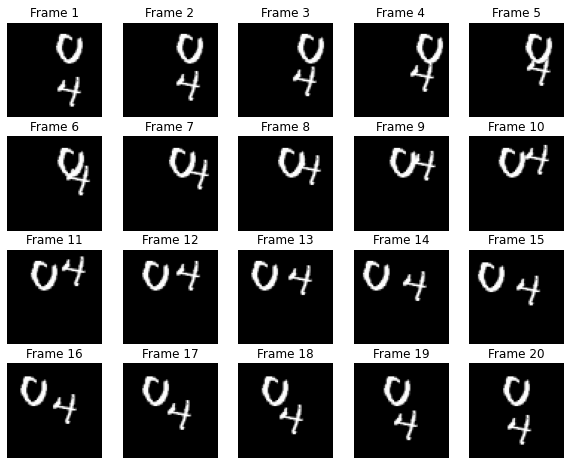

In [13]:
# Construct a figure on which we will visualize the images.
fig, axes = plt.subplots(4, 5, figsize=(10, 8))

# Plot each of the sequential images for one random data example.
data_choice = np.random.choice(range(len(train_dataset)), size=1)[0]
for idx, ax in enumerate(axes.flat):
    ax.imshow(np.squeeze(train_dataset[data_choice][idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Print information and display the figure.
print(f"Displaying frames for example {data_choice}.")
plt.show()

In [14]:
#input

inp = layers.Input(shape=(None, *x_train.shape[2:]))

x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(5,5),
    padding="same",
    return_sequences=True,
    activation="relu"
)(inp)

x = layers.BatchNormalization()(x)

x = layers.ConvLSTM2D(
    filters = 64,
    kernel_size=(3,3),
    padding="same",
    return_sequences=True,
    activation="relu"
)(x)

x = layers.BatchNormalization()(x)

x = layers.ConvLSTM2D(
    filters = 64,
    kernel_size=(3,3),
    padding="same",
    return_sequences=True,
    activation="relu"
)(x)

x = layers.Conv3D(
    filters=1,
    kernel_size=(3,3,3),
    activation="sigmoid",
    padding="same"
)(x)

model = keras.models.Model(inp, x)

model.compile(
    loss=keras.losses.binary_crossentropy,
    optimizer=keras.optimizers.Adam(),
)







In [15]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss",patience=10)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss",patience=5)


epochs = 22
batch_size = 5

model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val,y_val),
    callbacks=(early_stopping, reduce_lr)
)

Epoch 1/22
180/180 [==============================] - 4371s 24s/step - loss: 0.0862 - val_loss: 0.2522
Epoch 2/22
180/180 [==============================] - 4354s 24s/step - loss: 0.0295 - val_loss: 0.2772
Epoch 3/22
 25/180 [===>..........................] - ETA: 59:29 - loss: 0.0270

KeyboardInterrupt: 

AttributeError: module 'tensorflow' has no attribute 'Session'

Num GPUs Available:  0
